In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [21]:
X,y = sklearn.datasets.make_moons(200, noise = 0.15)

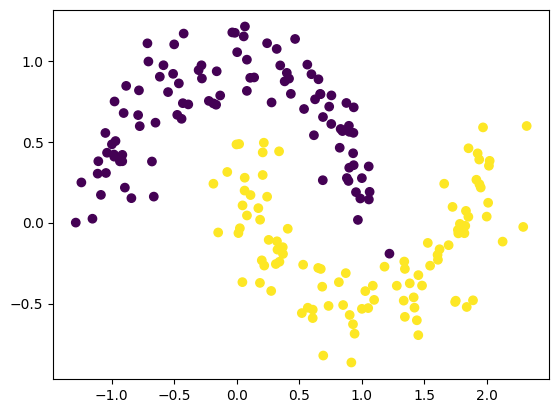

In [22]:
plt.scatter(X[:,0],X[:,1], c=y)

In [34]:
print(X.shape, y.shape)
print(f"X[:5]:\n{X[:5]}")
print(f"y[:5]:\n{y[:5]}")

(200, 2) (200,)
X[:5]:
[[ 1.83869194 -0.52098378]
 [ 2.29026572 -0.02635449]
 [ 0.87214609 -0.31185   ]
 [-0.99701626  0.4840451 ]
 [ 0.73451232 -0.51444735]]
y[:5]:
[1 1 1 0 1]


In [35]:
# NN config
input_neurons = 2 # The input has 2 columns
output_neurons = 2 # One for each class
samples = X.shape[0] # Sample count
learning_rate = 0.001  # The learning rate for the model
lambda_reg = 0.01  # L2 reg

In [36]:
def retrieve(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2

In [59]:
def forward(x, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    # First layer
    z1 = X.dot(W1) + b1
    # First activation
    a1 = np.tanh(z1)

    # Second layer
    z2 = a1.dot(W2) + b2
    # Second activation
    # Let's apply softmax (e^zi / sum(e^z))
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    return z1, a1, softmax

In [62]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    m = np.zeros(200)

    for i, correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted

    log_prob = -np.log(m)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss += reg_loss
    return float(loss/y.shape[0])

In [61]:
def predict(x, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    # First layer
    z1 = X.dot(W1) + b1
    # First activation
    a1 = np.tanh(z1)

    # Second layer
    z2 = a1.dot(W2) + b2
    # Second activation
    # Let's apply softmax (e^zi / sum(e^z))
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(softmax, axis=1)

In [65]:
def back_prop(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retrieve(model_dict)
        z1, a1, probs = forward(x, model_dict)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1  # (200, 2)
        dW2 = (a1.T).dot(delta3)  # a1: (3, 200) dot (200, 2) -> (3, 2)
        db2 = np.sum(delta3, axis=0, keepdims=True)  # (1, 2)

        delta2 = delta3.dot(W2.T) * (1-np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2)
        dW1 += lambda_reg * np.sum(W1)

        # Update weights
        W1 +=  -learning_rate * dW1  # W = W + (-lr*gradient) = W - lr*gradient
        b1 +=  -learning_rate * db1
        W2 +=  -learning_rate * dW2
        b2 +=  -learning_rate * db2

        # Update the model dict
        model_dict = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2 }

        # Print loss
        if i % 50 == 0:
            print(f"Loss at epoch {i} is: {round(loss(probs, y, model_dict), 3)}")

    return model_dict

In [54]:
def init_network(input_dim, hidden_dim, output_dim):
    # Xavier initialization
    model = {}
    W1 = np.random.rand(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.rand(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))

    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2

    return model

In [66]:
model_dict = init_network(input_dim=input_neurons, hidden_dim=3, output_dim=output_neurons)
model = back_prop(X, y, model_dict, 1500)

Loss at epoch 0 is: 0.694
Loss at epoch 50 is: 0.359
Loss at epoch 100 is: 0.266
Loss at epoch 150 is: 0.251
Loss at epoch 200 is: 0.248
Loss at epoch 250 is: 0.246
Loss at epoch 300 is: 0.246
Loss at epoch 350 is: 0.245
Loss at epoch 400 is: 0.245
Loss at epoch 450 is: 0.244
Loss at epoch 500 is: 0.244
Loss at epoch 550 is: 0.243
Loss at epoch 600 is: 0.243
Loss at epoch 650 is: 0.242
Loss at epoch 700 is: 0.242
Loss at epoch 750 is: 0.241
Loss at epoch 800 is: 0.24
Loss at epoch 850 is: 0.238
Loss at epoch 900 is: 0.235
Loss at epoch 950 is: 0.231
Loss at epoch 1000 is: 0.223
Loss at epoch 1050 is: 0.212
Loss at epoch 1100 is: 0.196
Loss at epoch 1150 is: 0.179
Loss at epoch 1200 is: 0.16
Loss at epoch 1250 is: 0.143
Loss at epoch 1300 is: 0.126
Loss at epoch 1350 is: 0.112
Loss at epoch 1400 is: 0.099
Loss at epoch 1450 is: 0.089
